# Predicting Economic Growth of Countries

# Abstract

Some of the code snippets taken from kaggle require the pandas adaptor for kagglehub which isn't available via conda. The following cell simply installs this

In [92]:
! pip install kagglehub[pandas-datasets]

zsh:1: no matches found: kagglehub[pandas-datasets]


We first load "Economic Indicators and Inflation" dataset from kaggle using kagglehub and the kagglehub pandas adaptor and save it to the variable ```df```. The dataset includes spaces in some of the headers and others not, which can be problematic when trying to reference these columns using pandas. To fix this, the column names have their whitespace stripped and overwritten. You can see the data set outputted belo

In [111]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize
import matplotlib.pyplot as plt

# dataset and code as from [1]
file_path = "Economic Indicators And Inflation (1) (1).csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "adilshamim8/economic-indicators-and-inflation",
  file_path,
)
df = df.rename(columns=lambda x: x.strip())
df
# End of source [1]

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53
...,...,...,...,...,...,...
299,Pakistan,2021,296.0,8.90,5.00,5.70
300,Pakistan,2022,350.0,12.30,5.00,6.00
301,Pakistan,2023,400.0,20.00,5.00,4.00
302,Pakistan,2024,450.0,25.00,5.00,3.00


encode data

In [95]:
#Encode data
le = LabelEncoder()
encoded_df = df.copy()
le.fit(df["Country"])
encoded_df["Country"] = le.transform(df["Country"])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
encoded_df

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,18,2010,15000.0,1.64,9.63,2.55
1,18,2011,15500.0,3.16,8.94,1.53
2,18,2012,16000.0,2.07,8.10,2.28
3,18,2013,16500.0,1.50,7.70,1.84
4,18,2014,17000.0,1.62,7.25,2.53
...,...,...,...,...,...,...
299,12,2021,296.0,8.90,5.00,5.70
300,12,2022,350.0,12.30,5.00,6.00
301,12,2023,400.0,20.00,5.00,4.00
302,12,2024,450.0,25.00,5.00,3.00


In [96]:
normalized_df = normalize(encoded_df)
normalized_df

array([[1.18936824e-03, 1.32812787e-01, 9.91140204e-01, 1.08364662e-04,
        6.36312011e-04, 1.68493835e-04],
       [1.15163705e-03, 1.28663450e-01, 9.91687457e-01, 2.02176282e-04,
        5.71979733e-04, 9.78891490e-05],
       [1.11620842e-03, 1.24767296e-01, 9.92185258e-01, 1.28363968e-04,
        5.02293787e-04, 1.41386399e-04],
       ...,
       [5.81872368e-03, 9.80939835e-01, 1.93957456e-01, 9.69787281e-03,
        2.42446820e-03, 1.93957456e-03],
       [5.78699529e-03, 9.76073205e-01, 2.17012323e-01, 1.20562402e-02,
        2.41124804e-03, 1.44674882e-03],
       [5.75276338e-03, 9.70778821e-01, 2.39698474e-01, 9.58793897e-03,
        2.39698474e-03, 1.53407024e-03]], shape=(304, 6))

split data

In [97]:
features = normalized_df[:, :-1]
labels = normalized_df[:, [-1]]
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

apply linear regression

In [ ]:
#Code from [2]
class LinearRegressionModel(torch.nn.Module):
	def __init__(self, features_count):
		super(LinearRegressionModel, self).__init__()
		self.linear = torch.nn.Linear(in_features=features_count, out_features=1)

	def forward(self, x):
		y_pred = self.linear(x)
		return y_pred

reg = LinearRegressionModel(x_train.shape[1])
criterion = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.SGD(reg.parameters(), lr = 0.001, weight_decay=1e-5)
losses = []
epochs = 20
for epoch in range(epochs):
	y_pred = reg(x_train)
	loss = criterion(y_pred, y_train)
	losses.append(loss.item())
	optimizer.zero_grad()
	loss.backward()
	optimizer.step()   
	print(f"epoch = {epoch}, loss = {loss}")
print("Done training!")
#End of source [2]


epoch = 0, loss = 154.88336181640625
epoch = 1, loss = 1.7185357809066772
epoch = 2, loss = 0.10069917142391205
epoch = 3, loss = 0.07293634861707687
epoch = 4, loss = 0.06334801018238068
epoch = 5, loss = 0.05524836480617523
epoch = 6, loss = 0.048280905932188034
epoch = 7, loss = 0.04228571057319641
epoch = 8, loss = 0.03712673857808113
epoch = 9, loss = 0.03268700838088989
epoch = 10, loss = 0.02886589616537094
epoch = 11, loss = 0.025576865300536156
epoch = 12, loss = 0.022745495662093163
epoch = 13, loss = 0.02030775137245655
epoch = 14, loss = 0.0182085782289505
epoch = 15, loss = 0.016400618478655815
epoch = 16, loss = 0.014843137934803963
epoch = 17, loss = 0.013501093722879887
epoch = 18, loss = 0.012344365008175373
epoch = 19, loss = 0.011347029358148575
Done training!


/home/aidan/miniconda3/envs/cwEnv/lib/python3.13/site-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


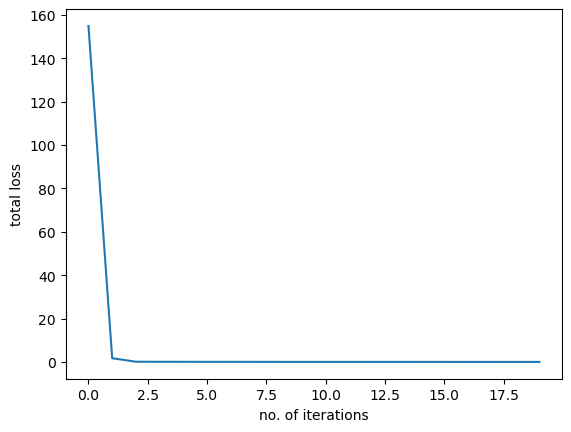

In [99]:
plt.plot(losses)
plt.xlabel("no. of iterations")
plt.ylabel("total loss")
plt.show()

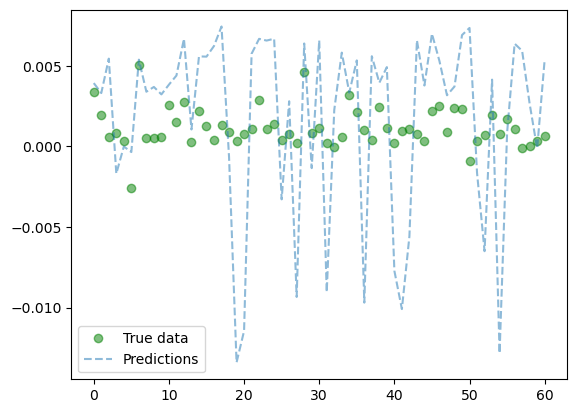

In [ ]:
# Code from [3]
# Clear figure
plt.clf()

# Get predictions
predicted = reg(x_test).data.numpy()

# Plot true data
plt.plot(y_test, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()
# End of [3]

# References
1. https://www.kaggle.com/datasets/adilshamim8/economic-indicators-and-inflation
2. https://www.geeksforgeeks.org/linear-regression-using-pytorch/
3. https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_linear_regression/#building-model